# lesson-1

#### Двухслойная нейронная сеть

In [1]:
%%writefile "neural_network.py"

import numpy as np
import pandas as pd

class Neural_Network:
    
    def __init__(self, neuron_numb, learning_rate, n_estimators, seed=42):
        
        self.neuron_numb = neuron_numb # число нейронов скрытого слоя
        self.learning_rate = learning_rate # скорость обучения (learning rate)
        self.n_estimators = n_estimators # количество эпох
        self.seed = seed
        
        self.w0 = None # для входного слоя
        self.w1 = None # для внутреннего слоя
    
    # сигмоида
    @staticmethod
    def sigmoid(x): # x = sigmoid
        return 1/(1+np.exp(-x))
    
    # производная сигмоиды
    @staticmethod
    def sigmoid_deriv(x): # x = сигмоида
        return (x)*(1 - (x))
    
    def fit(self, X_train, y_train):
        
        np.random.seed(self.seed)
        
        self.w0 = 2*np.random.random((X_train.shape[1], self.neuron_numb)) - 1 # для входного слоя
        self.w1 = 2*np.random.random((self.neuron_numb, y_train.shape[1])) - 1 # для внутреннего слоя
        
        # процесс обучения
        for i in range(self.n_estimators):

            # прямое распространение(feed forward)
            layer0 = X_train
            layer1 = self.sigmoid(np.dot(layer0, self.w0))
            layer2 = self.sigmoid(np.dot(layer1, self.w1))

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь
            layer2_delta = layer2_error * self.sigmoid_deriv(layer2) 
    
            layer1_error = layer2_delta.dot(self.w1.T)
            layer1_delta = layer1_error * self.sigmoid_deriv(layer1)
            # коррекция
            self.w1 += layer1.T.dot(layer2_delta) * self.learning_rate
            self.w0 += layer0.T.dot(layer1_delta) * self.learning_rate
    
    def predict(self, X_test):
        
        layer0 = X_test
        layer1 = self.sigmoid(np.dot(layer0, self.w0))
        layer2 = self.sigmoid(np.dot(layer1, self.w1))
        
        return layer2 

Overwriting neural_network.py


#### Библиотеки

In [2]:
from neural_network import Neural_Network

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

#### Подготовка данных

In [3]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [4]:
# получения данных из csv файла
iris_data = pd.read_csv("Iris.csv")
iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


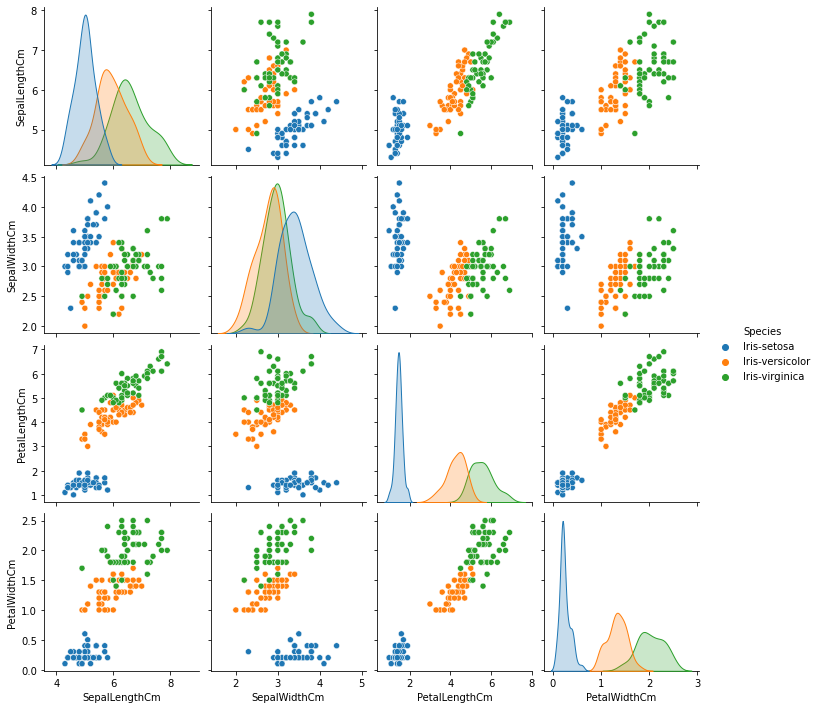

In [5]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")

In [6]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [7]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)
x[:5]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ]])

In [8]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)
y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [9]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train[:5]

array([[0.73446047, 0.37367287, 0.5411814 , 0.16750853],
       [0.70953708, 0.28008043, 0.61617694, 0.1960563 ],
       [0.70631892, 0.37838513, 0.5675777 , 0.18919257],
       [0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.71486543, 0.25995106, 0.62202576, 0.18567933]])

#### Обучение нейронной сети

In [10]:
# Пусть:
NEURON_NUMB = 5
LEARNING_RATE = 0.05
N_ESTIMATORS = 10000
SEED = 42

In [11]:
NN = Neural_Network(neuron_numb = NEURON_NUMB, learning_rate = LEARNING_RATE, n_estimators = N_ESTIMATORS, seed = SEED)
NN.fit(X_train, y_train)

#### Предсказание нейронной сети и метрика

In [12]:
predict = NN.predict(X_test)
error = np.mean(np.abs(predict - y_test))
accuracy = 1 - error
accuracy

0.9597836191419529

#### Подбор гиперпараметров

In [13]:
def nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = 5, learning_rate = 0.05, n_estimators = 10000, seed = 42):
    NN = Neural_Network(neuron_numb = neuron_numb, learning_rate = learning_rate, n_estimators = n_estimators, seed = seed)
    NN.fit(X_train, y_train)
    predict = NN.predict(X_test)
    error = np.mean(np.abs(predict - y_test))
    accuracy = 1 - error
    
    return accuracy

#### NEURON_NUMB

In [14]:
%%time

neuron_numb_list = [1, 2, 3, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000]

accuracy_neuron_numb = [nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = i, learning_rate = LEARNING_RATE, 
                                      n_estimators = N_ESTIMATORS, seed = SEED) for i in neuron_numb_list]

list(zip(accuracy_neuron_numb, neuron_numb_list))

Wall time: 1min 10s


[(0.641790705681216, 1),
 (0.8532162638087488, 2),
 (0.9591532524436583, 3),
 (0.9597836191419529, 5),
 (0.9600874619345543, 10),
 (0.9609290278740501, 20),
 (0.9613974624388191, 30),
 (0.9609748171805701, 50),
 (0.960795925926813, 100),
 (0.6666666481667108, 200),
 (0.6666666668927275, 300),
 (0.5866666720829863, 500),
 (0.6666666660916614, 1000)]

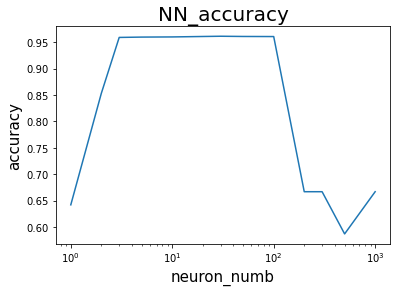

In [15]:
plt.plot(neuron_numb_list, accuracy_neuron_numb)
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('neuron_numb', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [16]:
max(zip(accuracy_neuron_numb, neuron_numb_list), key=lambda i : i[0])

(0.9613974624388191, 30)

Метрика растёт, до neuron_numb = 3, дальше медленно, до 100, дальше резкое падение.

#### LEARNING_RATE

In [17]:
%%time

learning_rate_list = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5 ,10]

accuracy_learning_rate = [nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = NEURON_NUMB, learning_rate = i, 
                                      n_estimators = N_ESTIMATORS, seed = SEED) for i in learning_rate_list]

list(zip(accuracy_learning_rate, learning_rate_list))

Wall time: 9.62 s


[(0.7620278989476669, 0.001),
 (0.7990231409239196, 0.002),
 (0.8397273266811723, 0.003),
 (0.9093480832887801, 0.005),
 (0.9434008004964916, 0.01),
 (0.9541329542313529, 0.02),
 (0.9572585607096473, 0.03),
 (0.9597836191419529, 0.05),
 (0.9622886884162167, 0.1),
 (0.9606067768804971, 0.2),
 (0.9614423155691196, 0.3),
 (0.9620090769391921, 0.5),
 (0.9704253081723474, 1),
 (0.7106114025973922, 2),
 (0.5000002940184001, 3),
 (0.6666666654439598, 5),
 (0.666666666666656, 10)]

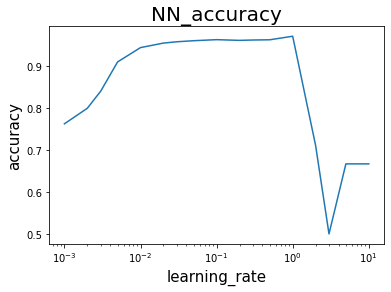

In [18]:
plt.plot(learning_rate_list, accuracy_learning_rate)
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('learning_rate', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [19]:
max(zip(accuracy_learning_rate, learning_rate_list), key=lambda i : i[0])

(0.9704253081723474, 1)

Видно, что метрика быстро растёт, до learning_rate = 0.02, дальше медленно, до learning_rate = 0.5, дальше резкое падение.
learning_rate = 1 хоть и показал лучшую метрику, но он выглдядит очень нестабильным, так как тогда мы возможно проскочем условно глобальный минимум.

### N_ESTIMATORS

In [20]:
%%time

n_estimators_list = [100, 200, 300, 500, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 50000, 100000, 200000, 300000, 500000,
                    1000000]

accuracy_n_estimators = [nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = NEURON_NUMB, 
                                      learning_rate = LEARNING_RATE, n_estimators = i, seed = SEED) for i in n_estimators_list]

list(zip(accuracy_n_estimators, n_estimators_list))

Wall time: 2min 7s


[(0.7052248785324821, 100),
 (0.7619648772347982, 200),
 (0.7822427614236708, 300),
 (0.8173623439075463, 500),
 (0.9093264444880963, 1000),
 (0.943393689908792, 2000),
 (0.9508203269291502, 3000),
 (0.956019394488726, 5000),
 (0.9597836191419529, 10000),
 (0.9622662942677362, 20000),
 (0.9638217637939026, 30000),
 (0.9679587579591954, 50000),
 (0.9651175170403176, 100000),
 (0.9852596056984594, 200000),
 (0.989591842403957, 300000),
 (0.991203103330246, 500000),
 (0.9919060397668304, 1000000)]

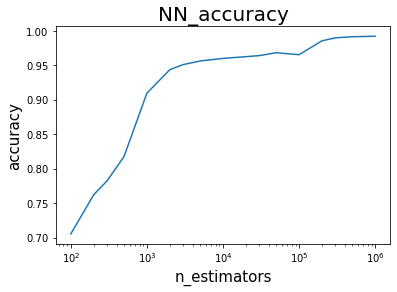

In [21]:
plt.plot(n_estimators_list, accuracy_n_estimators)
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('n_estimators', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [22]:
max(zip(accuracy_n_estimators, n_estimators_list), key=lambda i : i[0])

(0.9919060397668304, 1000000)

Метрика быстро растёт, до n_estimators = 2000, дальше медленно, до конца.

### SEED

In [23]:
%%time

seed_list = list(range(21))

accuracy_seed = [nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = NEURON_NUMB, 
                            learning_rate = LEARNING_RATE, n_estimators = N_ESTIMATORS, seed = i) for i in seed_list]

list(zip(accuracy_seed, seed_list))

Wall time: 11.7 s


[(0.9605325244517579, 0),
 (0.9594221816938863, 1),
 (0.960055183249819, 2),
 (0.9598680993047042, 3),
 (0.9601125672367307, 4),
 (0.960064889523206, 5),
 (0.9593624201270241, 6),
 (0.9598796208198829, 7),
 (0.9600450859327377, 8),
 (0.9595672493742948, 9),
 (0.9590162176403408, 10),
 (0.9597911948078203, 11),
 (0.9585941331005191, 12),
 (0.9595878492149175, 13),
 (0.9589171458429628, 14),
 (0.9596428723730608, 15),
 (0.9596340723403103, 16),
 (0.9598623220925755, 17),
 (0.9590382053708311, 18),
 (0.9601333160577986, 19),
 (0.9581987476293637, 20)]

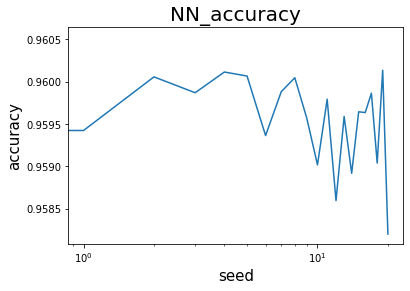

In [24]:
plt.plot(seed_list, accuracy_seed)
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('seed', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.show()

В среднем метрика очень слабо зависит от этого параметра.

Но если бы наше решение было не стабильным, например как при learning_rate = 1, то тогда:

In [25]:
%%time

seed_list = list(range(21))

accuracy_seed = [nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = NEURON_NUMB, 
                            learning_rate = 0.5, n_estimators = N_ESTIMATORS, seed = i) for i in seed_list]

list(zip(accuracy_seed, seed_list))

Wall time: 11.6 s


[(0.9733351161628401, 0),
 (0.9717278939847731, 1),
 (0.9730492233818564, 2),
 (0.9768561495149183, 3),
 (0.9754797624410618, 4),
 (0.9722391767076368, 5),
 (0.9717716301408789, 6),
 (0.973885968414833, 7),
 (0.9725665177418583, 8),
 (0.978878529322178, 9),
 (0.9596410198930619, 10),
 (0.9609707525103369, 11),
 (0.9735620159506755, 12),
 (0.9589285312383081, 13),
 (0.982294052307155, 14),
 (0.9617798690379311, 15),
 (0.9613674188534276, 16),
 (0.9616675047490261, 17),
 (0.9721304937312033, 18),
 (0.9618422819457709, 19),
 (0.9711124104677352, 20)]

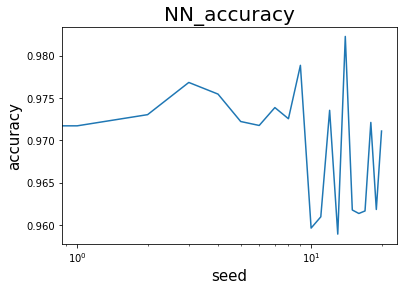

In [26]:
plt.plot(seed_list, accuracy_seed)
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('seed', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [27]:
max(zip(accuracy_seed, seed_list), key=lambda i : i[0])

(0.982294052307155, 14)

Разброс в метрике очень большой и установить закономерность сложно.

### Модель с лучшими гиперпараметрами

In [28]:
# Возьмём наше неустойчивое решение learning_rate = 1, оно показывает лучшую метрику при seed = 12, 
# теперь возьмём очень много эпох n_estimators = 1000000, тогда:
LEARNING_RATE = 1
# N_ESTIMATORS = 1000000
SEED = 12

In [29]:
%%time

# Остаётся подобрать neuron_numb
neuron_numb_list = list(range(50))

accuracy_neuron_numb = [nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = i, learning_rate = LEARNING_RATE, 
                                      n_estimators = N_ESTIMATORS, seed = SEED) for i in neuron_numb_list]

list(zip(accuracy_neuron_numb, neuron_numb_list))

Wall time: 47.1 s


[(0.5, 0),
 (0.6464930114747733, 1),
 (0.8488564336795243, 2),
 (0.9702173304888886, 3),
 (0.9680027713390011, 4),
 (0.9962976633739965, 5),
 (0.9702006543102766, 6),
 (0.9929507765283937, 7),
 (0.9732516469860161, 8),
 (0.9971018999490161, 9),
 (0.9961459907051172, 10),
 (0.9821721167349403, 11),
 (0.9761235570558483, 12),
 (0.986883860185666, 13),
 (0.9949427048911265, 14),
 (0.9797566305723726, 15),
 (0.9971552754299877, 16),
 (0.9828053541991664, 17),
 (0.6666666658406257, 18),
 (0.9756757118493398, 19),
 (0.6666666534925187, 20),
 (0.9697625169446886, 21),
 (0.9952826939866328, 22),
 (0.6666666666663078, 23),
 (0.9745704676627637, 24),
 (0.9891970636101931, 25),
 (0.9564982498527224, 26),
 (0.6666666648867691, 27),
 (0.9880516424146353, 28),
 (0.6666666666418212, 29),
 (0.6666666666666667, 30),
 (0.6666666666666667, 31),
 (0.6666666666666753, 32),
 (0.5333333337094648, 33),
 (0.5466666668654718, 34),
 (0.5866666666688425, 35),
 (0.5333333333524539, 36),
 (0.6666666666666663, 37),


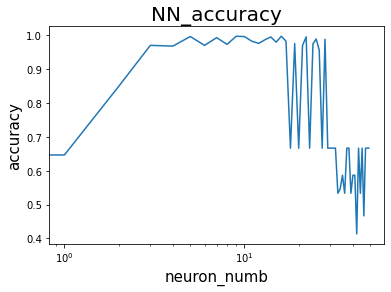

In [30]:
plt.plot(neuron_numb_list, accuracy_neuron_numb)
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('neuron_numb', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [31]:
max(zip(accuracy_neuron_numb, neuron_numb_list), key=lambda i : i[0])

(0.9971552754299877, 16)

График получился интересным, после neuron_numb = 17, решение становится очень не стабильным. Лучшее решение, при neuron_numb = 16.

In [32]:
NEURON_NUMB = 16
N_ESTIMATORS = 1000000

In [33]:
NN = Neural_Network(neuron_numb = NEURON_NUMB, learning_rate = LEARNING_RATE, n_estimators = N_ESTIMATORS, seed = SEED)
NN.fit(X_train, y_train)

In [34]:
predict = NN.predict(X_test)
error = np.mean(np.abs(predict - y_test))
best_accuracy = 1 - error
best_accuracy

0.9989844566537375

In [35]:
best_accuracy, accuracy

(0.9989844566537375, 0.9597836191419529)

In [36]:
best_accuracy - accuracy

0.0392008375117846

Мы улучшили нашу метрику на 0.0392 или на 3.92%